In [2]:
import numpy as np
import pandas as pd
import struct
import matplotlib.pyplot as plt

In [4]:
def leer_gadget2(file_path):
    with open(file_path, "rb") as f:
        # Leer primer bloque (tamaño del header)
        block_size_start = struct.unpack("I", f.read(4))[0]

        # Leer header (256 bytes)
        header_bytes = f.read(256)

        # Solo desempacamos lo necesario (npart: 6 enteros de 4 bytes)
        npart = struct.unpack("6I", header_bytes[:24])
        total_particles = sum(npart)

        # Saltar el resto del header
        block_size_end = struct.unpack("I", f.read(4))[0]
        assert block_size_start == block_size_end, "Block size mismatch en encabezado"

        # Leer posiciones
        block_size_start = struct.unpack("I", f.read(4))[0]
        positions = np.fromfile(f, dtype=np.float32, count=total_particles * 3).reshape((total_particles, 3))
        block_size_end = struct.unpack("I", f.read(4))[0]
        assert block_size_start == block_size_end, "Block size mismatch en posiciones"

        # Leer velocidades
        block_size_start = struct.unpack("I", f.read(4))[0]
        velocities = np.fromfile(f, dtype=np.float32, count=total_particles * 3).reshape((total_particles, 3))
        block_size_end = struct.unpack("I", f.read(4))[0]
        assert block_size_start == block_size_end, "Block size mismatch en velocidades"

        # Leer IDs
        block_size_start = struct.unpack("I", f.read(4))[0]
        ids = np.fromfile(f, dtype=np.uint32, count=total_particles)
        block_size_end = struct.unpack("I", f.read(4))[0]
        assert block_size_start == block_size_end, "Block size mismatch en IDs"

        # Intentar leer masas (si están presentes)
        try:
            block_size_start = struct.unpack("I", f.read(4))[0]
            masses = np.fromfile(f, dtype=np.float32, count=total_particles)
            block_size_end = struct.unpack("I", f.read(4))[0]
            assert block_size_start == block_size_end, "Block size mismatch en masas"
        except:
            masses = None

    # Crear DataFrame
    df = pd.DataFrame({
        "ID": ids,
        "X": positions[:, 0],
        "Y": positions[:, 1],
        "Z": positions[:, 2],
        "VX": velocities[:, 0],
        "VY": velocities[:, 1],
        "VZ": velocities[:, 2],
    })

    if masses is not None:
        df["Mass"] = masses

    return df

# Uso:
archivo = r"Archivos\AM2229-735_host_RL_050"
df_gadget = leer_gadget2(archivo)
df_gadget


,ID,X,Y,Z,VX,VY,VZ,Mass
0,429542,-6139.246094,-65.043045,-4120.191406,-211.133438,-2.388370,-141.643646,0.000030
1,2031584,-5968.082520,-808.355225,-4296.529785,-205.248184,-27.948269,-147.707611,0.000030
2,855092,-6168.680176,-1607.304321,-3851.701904,-212.151428,-55.422649,-132.414932,0.000030
3,1383630,-5093.544922,-2260.614502,-4018.954346,-175.120163,-77.861580,-138.118774,0.000030
4,865115,-4793.813965,-2562.677246,-3903.351074,-164.795074,-88.233559,-134.127151,0.000030
...,...,...,...,...,...,...,...,...
4334756,4176709,80.001984,31.998182,279.918488,20.145805,43.748489,8.327011,0.000004
4334757,4137086,53.549637,34.668991,276.359558,80.362534,-12.354066,20.103807,0.000004
4334758,4174688,13.888486,60.761311,265.012543,18.216602,17.566277,-44.761848,0.000004
4334759,4285619,57.072998,118.474464,271.629486,-40.505226,-79.648994,8.942924,0.000004


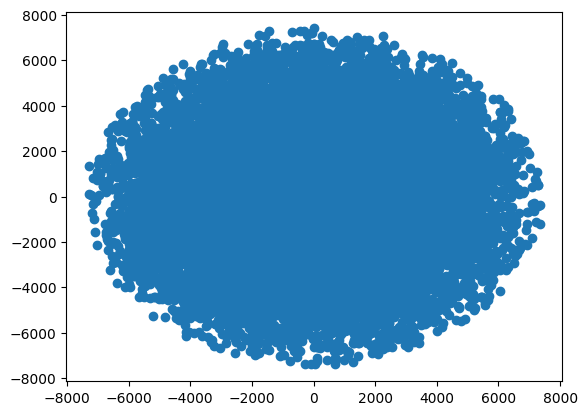

In [7]:
plt.scatter(x=df_gadget.Y, y=df_gadget.Z)
plt.show()